In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Tính đạo hàm bằng định nghĩa

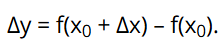
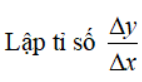

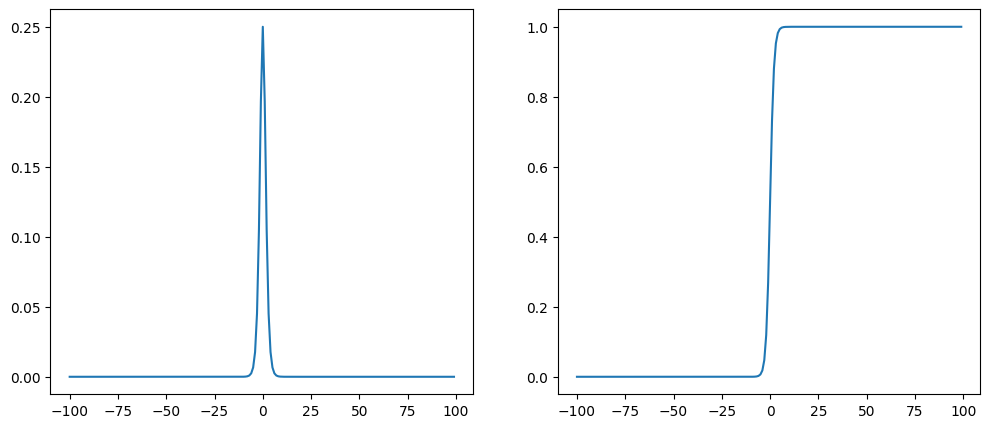

In [34]:
x = np.arange(-100,100)
def y(x):
    return x**2 + 3*x + 2
def sigmoid(x):
    return 1/(1+np.exp(-x))
def d_sigmoid(x, delta_x=0.0001):
    return (sigmoid(x+delta_x)-sigmoid(x))/delta_x
def dy(x, delta_x=0.0001):
    return (y(x+delta_x) - y(x))/delta_x
d_y = list(map(d_sigmoid, x))
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x, d_y)
plt.subplot(1,2,2)
plt.plot(x, list(map(sigmoid, x)))

In [178]:
class BinaryCrossEntropy:
    def __init__(self):
        pass
    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return -y_true*np.log(y_pred) - (1-y_true)*np.log(1-y_pred)
    __call__ = forward
    def backward(self):
        return -self.y_true/self.y_pred + (1-self.y_true)/(1-self.y_pred)
class CrossEntropy:
    def __init__(self):
        pass

    def forward(self, y_pred, y_true):
        loss = 0        
        for i in range(len(y_pred)):
            loss += -y_true[i]*np.log(y_pred[i,y_true[i]])
        return loss
    __call__ = forward

In [170]:
class Sigmoid:
    def __init__(self):
        pass
    def forward(self, x):
        self.x = x
        return 1/(1+np.exp(-x))
    __call__ = forward
    def backward(self):
        return np.exp(-self.x)/(1+np.exp(-self.x))**2
class Softmax:
    def __init__(self):
        pass
    def forward(self, x, dim=1):
        a = np.exp(x)
        b = np.sum(a, axis=dim)
        return np.array([a[i]/b[i] for i in range(len(a))])
        
    __call__ = forward
class ReLU: 
    def __init__(self):
        pass
    def forward(self, x):
        self.x = x
        return np.maximum(0, x)
    __call__ = forward
    def backward(self):
        return np.array(self.x > 0, dtype=float)

C:\Users\huymo\AppData\Local\Temp\ipykernel_26620\2006519253.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000)


np.float64(inf)

In [176]:
class NeuralNetwork:
    def __init__(self, input_layer: int, hidden_layer: int, output_layer: int):
        self.input_layer = input_layer
        self.hidden_layer = hidden_layer
        self.output_layer = output_layer
        self.weights1 = np.random.rand(input_layer, hidden_layer)*0.01
        self.bias1 = np.random.rand(hidden_layer)
        self.weights2 = np.random.rand(hidden_layer, output_layer)*0.01
        self.bias2 = np.random.rand(output_layer)
        self.activation = ReLU()
        self.sigmoid = Softmax()
        self.criterion = CrossEntropy()
    def forward(self, x):
        if len(x.shape) > 2:
            x = x.view(x.size(0),-1)
        self.x = x #(1,128)
        self.z1 = np.dot(x, self.weights1) + self.bias1#(1,128) * (128,64) = (1,64)
        self.a1 = self.activation(self.z1) # (1, 64)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2 #(1,64) * (64,1) = (1,1)
        self.a2 = self.sigmoid(self.z2) # (1, 1)
        return self.a2
    __call__ = forward
    def backward(self, X, y_true, learning_rate = 0.01):
        n = X.shape[0]
        dL_dy = -y_true/self.a2 + (1-y_true)/(1-self.a2) # (1,1) - (b, c)
        dy_dz2 = self.sigmoid(self.a2)*(1-self.sigmoid(self.a2)) # (1,1) - (b, c)
        dz2_dw1 = self.a1 # (1,64)
        dL_dz2 = dy_dz2*dL_dy #(1,1) - (b,c)
        dL_dw2 = np.dot(dz2_dw1.T, dL_dz2 )/n ### (64,1)
        dz2_da1 = self.weights2 # (64,1) 
        da1_dz1 = self.sigmoid(self.z1)*(1-self.sigmoid(self.z1)) # (1,64)
        dz1_dw1 = self.x # (1,128)
        a = np.dot(dL_dz2, dz2_da1.T)
        b = a*da1_dz1
        dL_dw1 = np.dot(dz1_dw1.T,b)/n ### (128, 64)
        self.weights1 -= learning_rate*dL_dw1
        self.weights2 -= learning_rate*dL_dw2
    def train(self, X, Y, epochs=100):
        for i in range(epochs):
            y_pred = self.forward(X)
            loss = self.criterion(y_pred, Y)
            self.backward(X, Y)
            print(f'Epoch: {i}, Loss: {loss}')
    def predict(self, X):
        return self.forward(X)

In [179]:
np.random.seed(0)
x = np.random.rand(2,128)
y = np.array([[1],[0]])
model = NeuralNetwork(128, 64, 2 )
model = model.train(x, y)

Epoch: 0, Loss: [0.66420291]
Epoch: 1, Loss: [0.6716888]
Epoch: 2, Loss: [0.67726247]
Epoch: 3, Loss: [0.68140545]
Epoch: 4, Loss: [0.68448113]
Epoch: 5, Loss: [0.68676234]
Epoch: 6, Loss: [0.68845313]
Epoch: 7, Loss: [0.68970568]
Epoch: 8, Loss: [0.69063323]
Epoch: 9, Loss: [0.69131992]
Epoch: 10, Loss: [0.69182819]
Epoch: 11, Loss: [0.69220435]
Epoch: 12, Loss: [0.69248271]
Epoch: 13, Loss: [0.69268869]
Epoch: 14, Loss: [0.69284111]
Epoch: 15, Loss: [0.6929539]
Epoch: 16, Loss: [0.69303736]
Epoch: 17, Loss: [0.69309913]
Epoch: 18, Loss: [0.69314485]
Epoch: 19, Loss: [0.69317869]
Epoch: 20, Loss: [0.69320376]
Epoch: 21, Loss: [0.69322233]
Epoch: 22, Loss: [0.69323609]
Epoch: 23, Loss: [0.6932463]
Epoch: 24, Loss: [0.69325388]
Epoch: 25, Loss: [0.69325951]
Epoch: 26, Loss: [0.69326371]
Epoch: 27, Loss: [0.69326684]
Epoch: 28, Loss: [0.69326918]
Epoch: 29, Loss: [0.69327095]
Epoch: 30, Loss: [0.69327228]
Epoch: 31, Loss: [0.6932733]
Epoch: 32, Loss: [0.69327408]
Epoch: 33, Loss: [0.6932